<a href="https://colab.research.google.com/github/enrique368/otroo/blob/main/My_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv('/content/athlete_events.csv')
data = data[data['Year'] >= 1956]
data = data.drop(['NOC','City', 'Event', 'Games','ID'], axis=1)
data.head()

,Name,Sex,Age,Height,Weight,Team,Year,Season,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,Judo,NaN
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,NaN
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,NaN


In [ ]:
data.describe()

,Age,Height,Weight,Year
count,213753.000000,200639.000000,199928.000000,215506.000000
mean,24.992889,175.335678,70.664212,1990.788108
std,5.510339,10.611359,14.422545,17.428899
min,11.000000,127.000000,25.000000,1956.000000
25%,21.000000,168.000000,60.000000,1976.000000
50%,24.000000,175.000000,70.000000,1992.000000
75%,28.000000,183.000000,79.000000,2006.000000
max,71.000000,226.000000,214.000000,2016.000000


In [ ]:
athletes_medals = data[['Name', 'Medal']]
athletes_medals = data[['Name', 'Medal']].dropna(subset=['Medal'])
athletes_medals.head(20)

,Name,Medal
40,Juhamatti Tapio Aaltonen,Bronze
60,Kjetil Andr Aamodt,Gold
61,Kjetil Andr Aamodt,Bronze
63,Kjetil Andr Aamodt,Silver
64,Kjetil Andr Aamodt,Bronze
67,Kjetil Andr Aamodt,Silver
73,Kjetil Andr Aamodt,Gold
76,Kjetil Andr Aamodt,Gold
78,Kjetil Andr Aamodt,Gold
79,Ragnhild Margrethe Aamodt,Gold


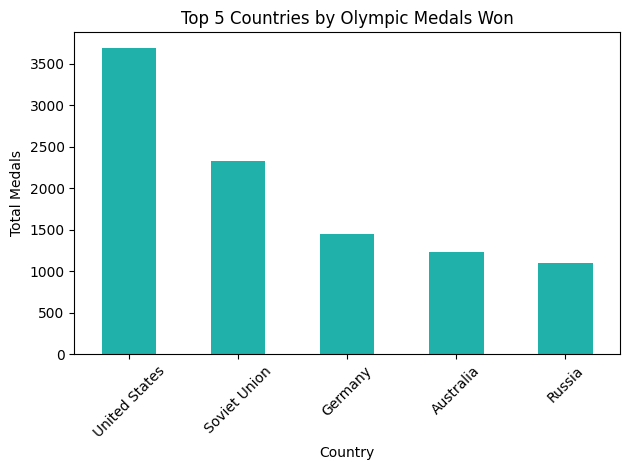

In [ ]:

medal_winners = data.dropna(subset=['Medal'])


country_medal_counts = medal_winners['Team'].value_counts().head(5)

country_medal_counts.plot(kind='bar', color='lightseagreen')
plt.title('Top 5 Countries by Olympic Medals Won')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



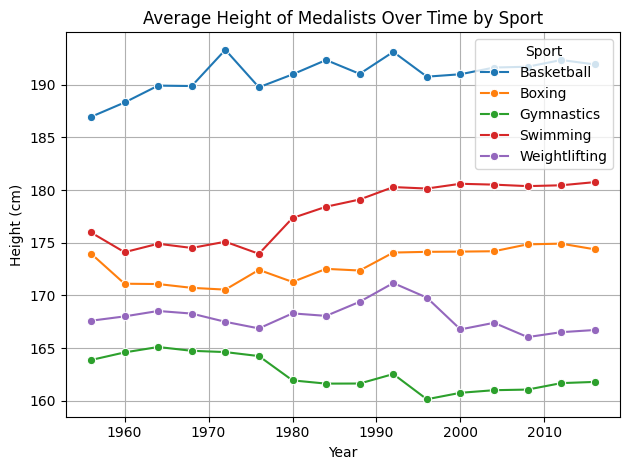

In [ ]:


avg_by_sport = data.groupby(['Sport', 'Year'])[['Height', 'Weight']].mean().reset_index()


selected_sports = ['Basketball', 'Gymnastics', 'Swimming', 'Weightlifting', 'Boxing']
subset = avg_by_sport[avg_by_sport['Sport'].isin(selected_sports)]

sns.lineplot(data=subset, x='Year', y='Height', hue='Sport', marker='o')
plt.title('Average Height of Medalists Over Time by Sport')
plt.ylabel('Height (cm)')
plt.xlabel('Year')
plt.legend(title='Sport')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
modern_data = data[(data['Year'] >= 1956) & (~data['Height'].isna()) & (~data['Medal'].isna())]
selected_sports = ['Basketball', 'Gymnastics', 'Swimming', 'Weightlifting', 'Boxing']
grouped = modern_data[modern_data['Sport'].isin(selected_sports)]
avg_height = grouped.groupby(['Sport', 'Year'])['Height'].mean().reset_index()

avg_height['Height_Change'] = avg_height.groupby('Sport')['Height'].diff()

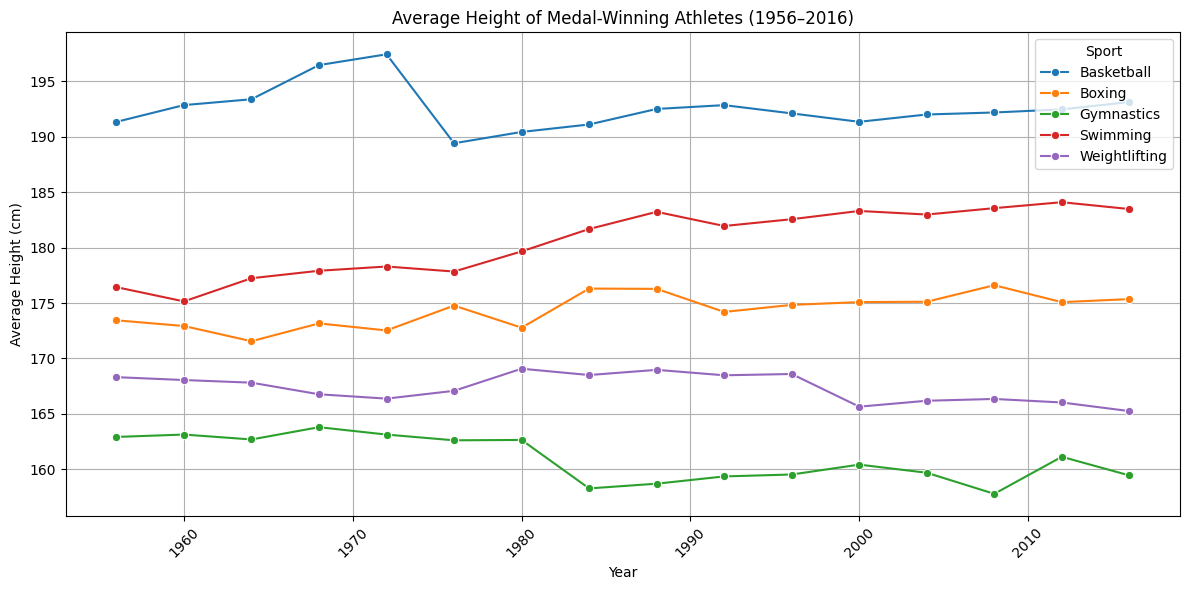

In [ ]:


plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_height, x='Year', y='Height', hue='Sport', marker='o')
plt.title('Average Height of Medal-Winning Athletes (1956–2016)')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sport')
plt.tight_layout()
plt.show()


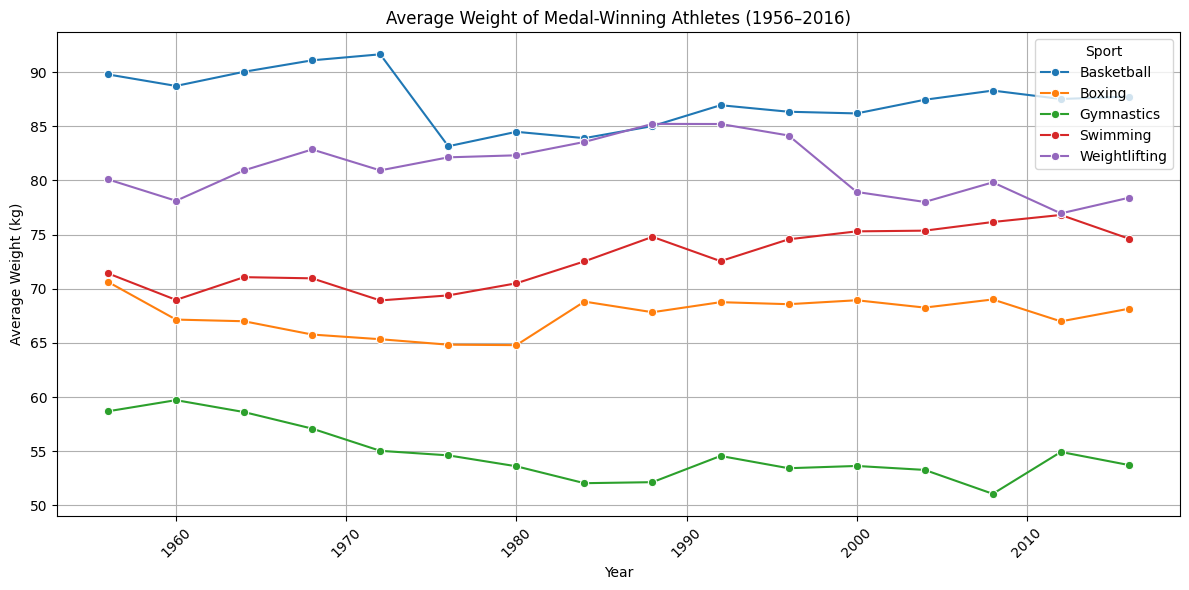

In [ ]:


modern_data = data[(data['Year'] >= 1956) & (~data['Weight'].isna()) & (~data['Medal'].isna())]


selected_sports = ['Basketball', 'Gymnastics', 'Swimming', 'Weightlifting', 'Boxing']

grouped = modern_data[modern_data['Sport'].isin(selected_sports)]
avg_weight = grouped.groupby(['Sport', 'Year'])['Weight'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_weight, x='Year', y='Weight', hue='Sport', marker='o')
plt.title('Average Weight of Medal-Winning Athletes (1956–2016)')
plt.xlabel('Year')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sport')
plt.tight_layout()
plt.show()


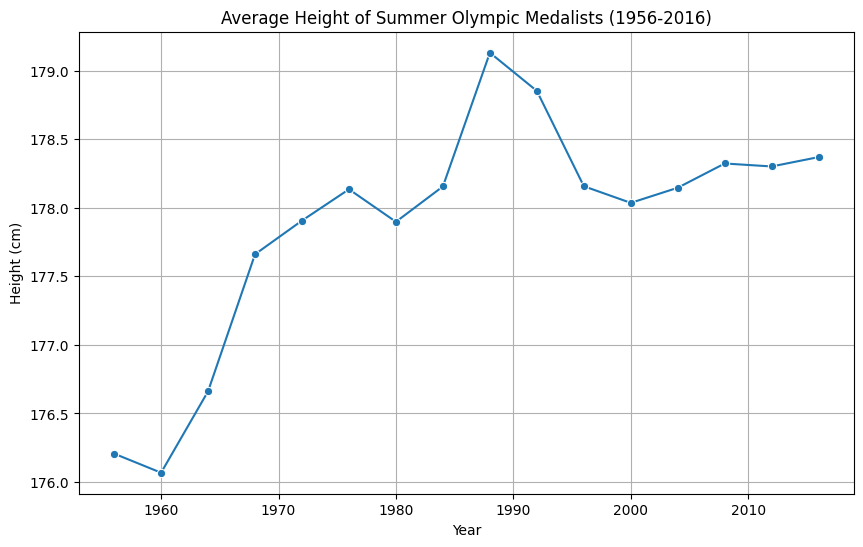

In [ ]:


summer_data = data[
    (data['Season'] == 'Summer') &
    (~data['Medal'].isna()) &
    (~data['Height'].isna()) &
    (data['Year'] >= 1956)
]


avg_height_year = summer_data.groupby('Year')['Height'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_height_year, x='Year', y='Height', marker='o')
plt.title('Average Height of Summer Olympic Medalists (1956-2016)')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()


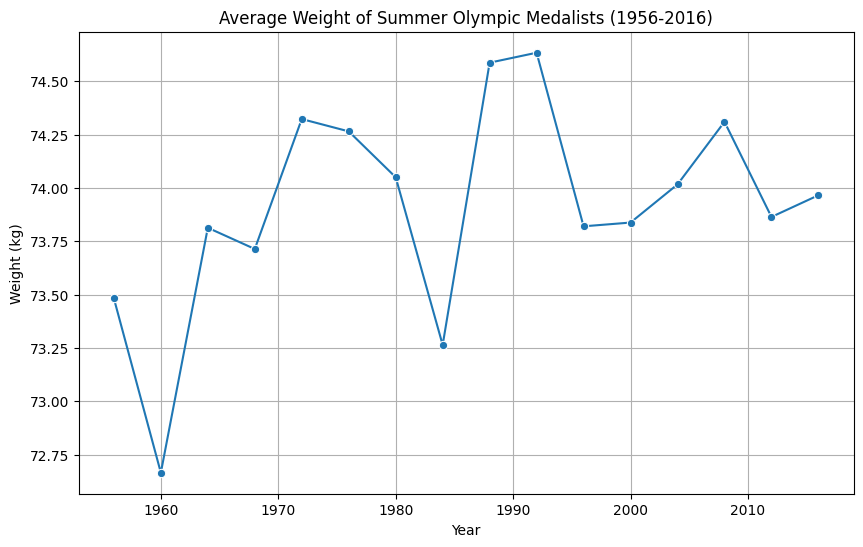

In [ ]:
avg_weight_year = summer_data.groupby('Year')['Weight'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_weight_year, x='Year', y='Weight', marker='o')
plt.title('Average Weight of Summer Olympic Medalists (1956-2016)')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


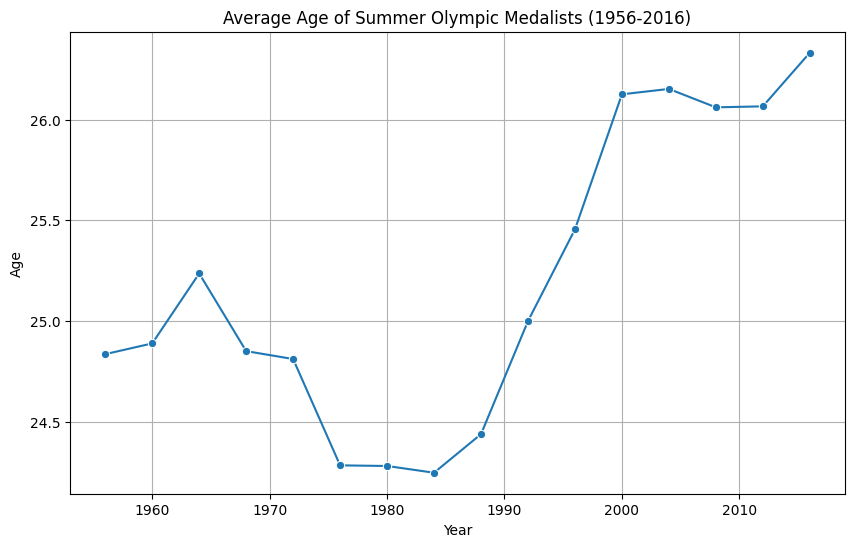

In [ ]:
avg_weight_year = summer_data.groupby('Year')['Age'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_weight_year, x='Year', y='Age', marker='o')
plt.title('Average Age of Summer Olympic Medalists (1956-2016)')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [ ]:
X = data.drop('Weight', axis=1)
X = pd.get_dummies(X)
print(X['Weight'].dtype)  # Should be int or float


NameError: name 'data' is not defined

In [ ]:

X = data.drop('Weight', axis=1)  # Replace with your feature columns
y = data['Height']              # Replace with your target column
X = pd.get_dummies(X)
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state= 42)

In [ ]:

X = data.drop('Weight', axis=1)  # Replace with your feature columns
y = data['Height']              # Replace with your target column
X = pd.get_dummies(X)
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state= 42)

model = LogisticRegression()
model.fit(X_train, y_train)
# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
